<a href="https://colab.research.google.com/github/saga743k/Deep-Learning-Experiments/blob/main/Ex_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 184s 378ms/step - loss: 0.1673 - val_loss: 0.0736
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 196s 365ms/step - loss: 0.0733 - val_loss: 0.0700
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 200s 361ms/step - loss: 0.0704 - val_loss: 0.0684
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 382ms/step - loss: 0.0689 - val_loss: 0.0674
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 194s 365ms/step - loss: 0.0678 - val_loss: 0.0666
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 366ms/step - loss: 0.0669 - val_loss: 0.0660
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 366ms/step - loss: 0.0667 - val_loss: 0.0655
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 199s 359ms/step - loss: 0.0658 - val_loss: 0.0650
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 360ms/step - loss: 0.0655 - val_loss: 0.0647
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 360ms/step - loss: 0.0650 - val_loss: 0.0649


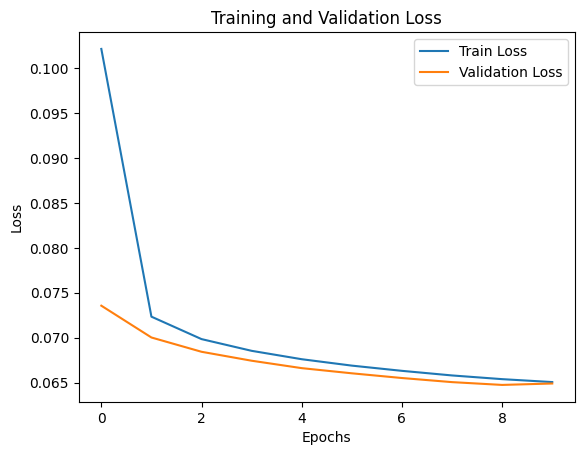

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


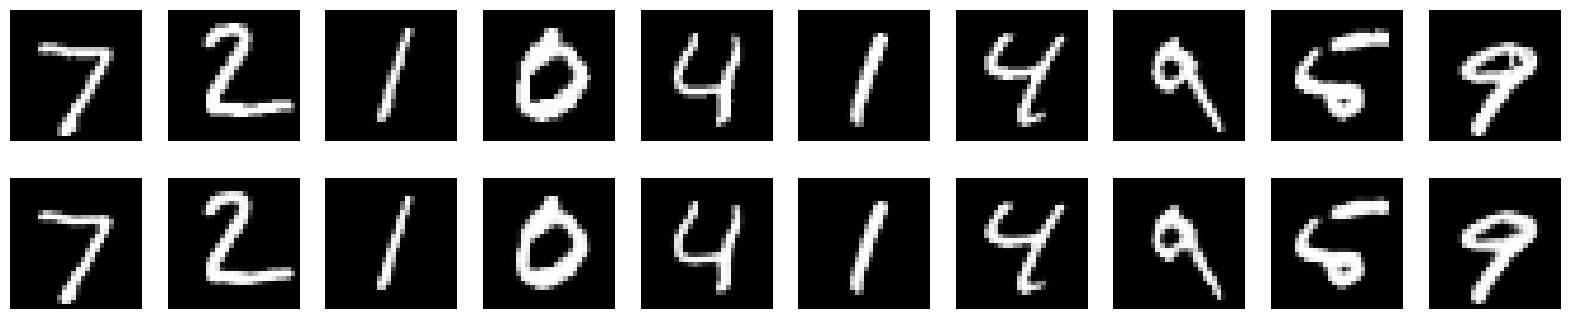

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Encoded images shape: (10000, 7, 7, 64)


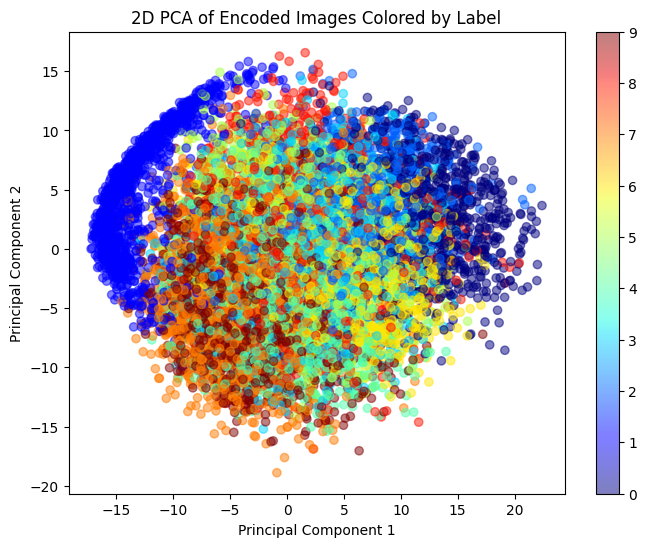

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# 1. Load and preprocess the MNIST dataset (with labels this time)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to be 28x28x1 (grayscale)
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# 2. Build the Autoencoder model

# Encoder
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Train the Autoencoder model
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# 4. Evaluate the performance (Visualize the loss curve)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 5. Visualize some test images and their reconstructions
decoded_imgs = autoencoder.predict(x_test)

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
plt.show()

# 6. Use the encoder to get lower-dimensional representations
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
print(f"Encoded images shape: {encoded_imgs.shape}")

# 7. Optional: Visualize with PCA
from sklearn.decomposition import PCA

# Flatten the encoded images for 2D PCA
encoded_imgs_flattened = encoded_imgs.reshape(encoded_imgs.shape[0], -1)

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs_flattened)

# Plot the PCA result, colored by true labels
plt.figure(figsize=(8, 6))
plt.scatter(encoded_imgs_2d[:, 0], encoded_imgs_2d[:, 1], c=y_test, cmap='jet', alpha=0.5)
plt.colorbar()
plt.title("2D PCA of Encoded Images Colored by Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()